<a href="https://colab.research.google.com/github/AarnoStormborn/Deep-Learning-with-PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflows

In [33]:
import torch
print(torch.__version__)

2.1.0+cu118


In [34]:
torch.rand(2,2)

tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

# Workflow

The steps involved in this workflow:
1. Data Preparation
2. Build Model
3. Fitting Model to Data
4. Making Predictions & Evaluation
5. Saving and Loading model

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Data Preparation

In [36]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

### Train Test Split

In [37]:
# Splitting
split = 0.8

train_split = int(split * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize data

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Train Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14});

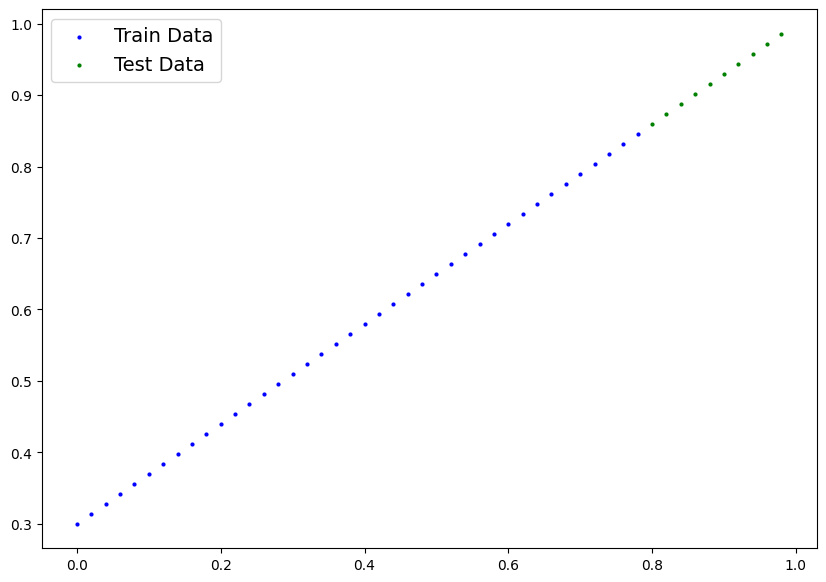

In [39]:
plot_predictions()

## Building first model with PyTorch!!!

In [40]:
# Create Linear Regression model class

class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch model building essentials

1. torch.nn -> Contains all building blocks for neural networks
2. torch.nn.Parameter -> defining model parameters
3. torch.nn.Module -> Base class of all neural network modules
4. torch.optim -> optimizers in PyTorch
5. forward() -> Always need to override this method, defines the computation on each step

In [41]:
# Create random seed
torch.manual_seed(42)

# Create instance of model
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [42]:
# Check Parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [43]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

In [44]:
# Inference mode - Relatively newer method
with torch.inference_mode():
    y_preds = model_0(X_test)

# Older method
# with torch.no_grad():
#     y_preds = model_0(X_test)

In [45]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

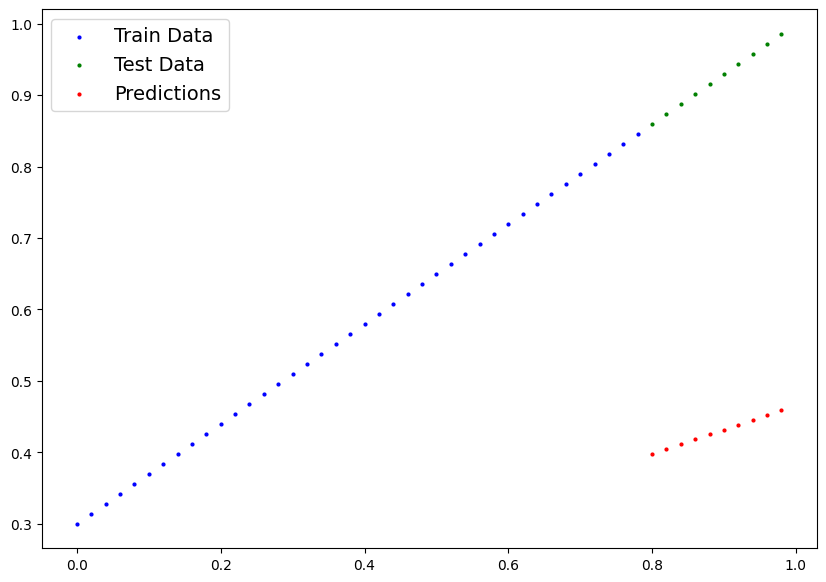

In [46]:
plot_predictions(predictions=y_preds);

## Training a Model

* Loss Function
* Optimizers

In [47]:
# Setup loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [48]:
# Setup optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Building a Training & Testing loop

1. Loop through data
2. Foward pass
3. Calculate loss
4. Optimizer zero grad
5. Loss Backward
6. Optimizer step


In [49]:
torch.manual_seed(42)

epochs = 100

# Loop through the training data
for epoch in range(epochs):

    # Set the model in training mode
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step
    optimizer.step()

model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [50]:
# model_0.state_dict()

In [51]:
weight, bias

(0.7, 0.3)

In [52]:
with torch.inference_mode():
    y_preds = model_0(X_test)

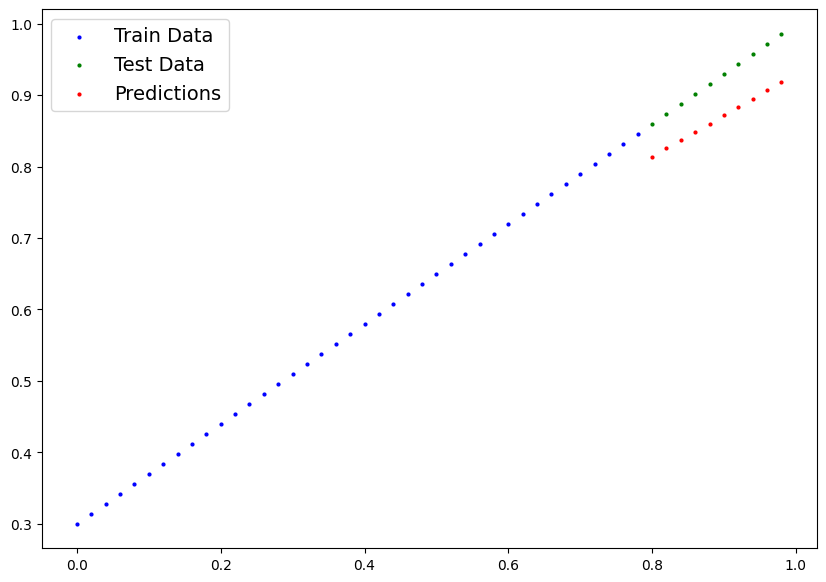

In [53]:
plot_predictions(predictions=y_preds)

### Training & Testing Loop

In [54]:
torch.manual_seed(42)

epochs = 200

# track model progress
epoch_count=[]
loss_vals=[]
test_loss_vals=[]

# Loop through the training data
for epoch in range(epochs):

    # Set the model in training mode
    model_0.train()

    # Forward pass
    y_pred = model_0(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Testing
    model_0.eval() # Set the model in testing mode
    with torch.inference_mode():
        # Forward pass
        test_pred = model_0(X_test)

        # Loss on test set
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_vals.append(loss)
        test_loss_vals.append(test_loss)
        print(f"Epoch: {epoch}  |  Train Loss: {loss}  |  Test loss: {test_loss}")
        print(model_0.state_dict())
        print("="*50)

Epoch: 0  |  Train Loss: 0.024458957836031914  |  Test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 10  |  Train Loss: 0.021020207554101944  |  Test loss: 0.04819049686193466
OrderedDict([('weights', tensor([0.5972])), ('bias', tensor([0.3433]))])
Epoch: 20  |  Train Loss: 0.01758546568453312  |  Test loss: 0.04060482233762741
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3358]))])
Epoch: 30  |  Train Loss: 0.014155393466353416  |  Test loss: 0.03233227878808975
OrderedDict([('weights', tensor([0.6313])), ('bias', tensor([0.3288]))])
Epoch: 40  |  Train Loss: 0.010716589167714119  |  Test loss: 0.024059748277068138
OrderedDict([('weights', tensor([0.6485])), ('bias', tensor([0.3218]))])
Epoch: 50  |  Train Loss: 0.0072835334576666355  |  Test loss: 0.016474086791276932
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
Epoch: 60  |  Train Loss: 0.0038517764769494534  |  Test loss: 0.0082

In [55]:
with torch.inference_mode():
    preds = model_0(X_test)

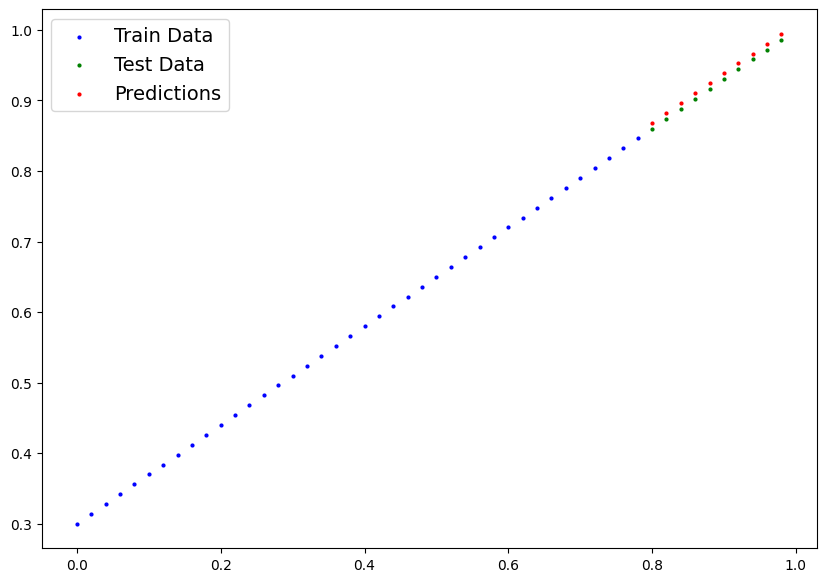

In [56]:
plot_predictions(predictions=preds)

### Plot the model progress

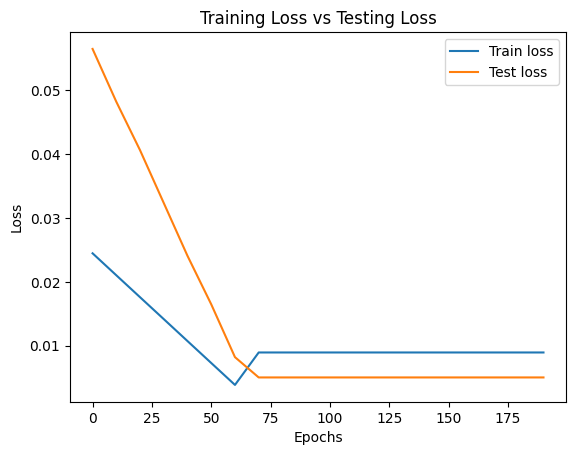

In [59]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_vals).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_vals).numpy()), label="Test loss")
plt.title("Training Loss vs Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

## Saving & Loading PyTorch Model

**Saving & Loading Entire Model**
* `torch.save()` - Pickle format
* `torch.load()` - Load saved Model (pickle)

**Saving & Loading Model Parameters**
* `torch.save(model.state_dict())` - Save the state dict of the model
* `torch.nn.Module.load_state_dict()` - Load saved state dict (loading parameters of a model)

In [62]:
# Saving the PyTorch model
from pathlib import Path

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pt"
MODEL_SAVE_PATH = MODEL_PATH  / MODEL_NAME

# Saving the Model State Dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
print("Model Saved")

Model Saved


In [63]:
# Loading the PyTorch model
# Since 'state_dict' was saved, a new model needs to be instantiated

# Create new instance of model
loaded_model = LinearRegressionModel()

print(f"New model State Dict: {loaded_model.state_dict()}")
# Load saved state_dict
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"After loading Saved State Dict: {loaded_model.state_dict()}")

New model State Dict: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
After loading Saved State Dict: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


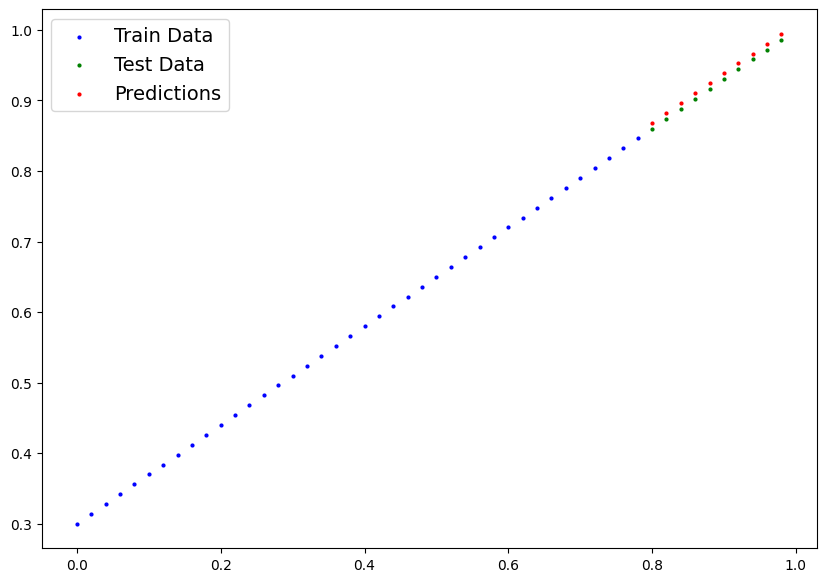

In [65]:
# Testing Loaded Model
with torch.inference_mode():
    preds = loaded_model(X_test)

plot_predictions(predictions=preds)

## Practise - Creating a new model

In [73]:
import torch
from torch import nn

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [74]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

In [75]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [76]:
torch.manual_seed(42)

epochs=150

epoch_count = []
loss_vals = []
test_loss_vals = []

for epoch in range(1, epochs+1):
    model_1.train()

    y_preds = model_1(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_vals.append(loss)
        test_loss_vals.append(test_loss)

        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(f"="*50)

Epoch: 10 | Loss: 0.43007802963256836 | Test Loss: 0.3984473943710327
Epoch: 20 | Loss: 0.2910781800746918 | Test Loss: 0.20944757759571075
Epoch: 30 | Loss: 0.152078315615654 | Test Loss: 0.02059648558497429
Epoch: 40 | Loss: 0.06501899659633636 | Test Loss: 0.14846496284008026
Epoch: 50 | Loss: 0.06992020457983017 | Test Loss: 0.19639885425567627
Epoch: 60 | Loss: 0.057294946163892746 | Test Loss: 0.14887471497058868
Epoch: 70 | Loss: 0.04528895765542984 | Test Loss: 0.08643670380115509
Epoch: 80 | Loss: 0.03684772923588753 | Test Loss: 0.06523077189922333
Epoch: 90 | Loss: 0.026546627283096313 | Test Loss: 0.06106187775731087
Epoch: 100 | Loss: 0.016099631786346436 | Test Loss: 0.032397132366895676
Epoch: 110 | Loss: 0.005318976938724518 | Test Loss: 0.010745054110884666
Epoch: 120 | Loss: 0.0035390376579016447 | Test Loss: 0.009591621346771717
Epoch: 130 | Loss: 0.0008563116425648332 | Test Loss: 0.0003226459084544331
Epoch: 140 | Loss: 0.001107479678466916 | Test Loss: 0.002644884

In [77]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7030]])),
             ('linear_layer.bias', tensor([0.2985]))])

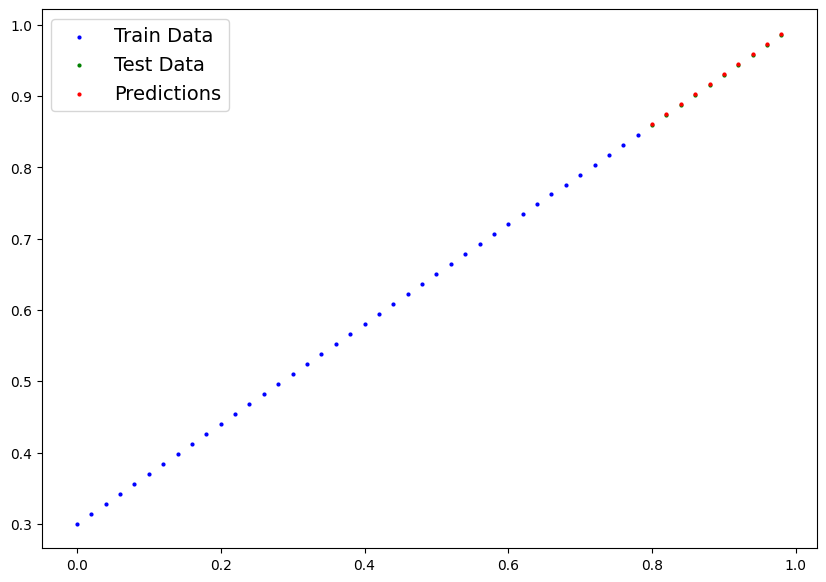

In [78]:
with torch.inference_mode():
    preds = model_1(X_test)

plot_predictions(predictions=preds)

In [79]:
# Saving the model

MODEL_NAME = "01_pytorch_workflow_model_2.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)